Section 1

In [52]:
from keras.datasets import mnist

from keras import models

from keras import layers

from tensorflow.keras.utils import to_categorical

I am simply splitting my data in traing and test sets

In [53]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

I am architecting my Neural Network

In [54]:
myNetwork = models.Sequential()

In [55]:
myNetwork.add(layers.Dense(784,activation='relu',input_shape=(28*28,)))

In [56]:
myNetwork.add(layers.Dense(784,activation='relu',input_shape=(28*28,)))

In [57]:
myNetwork.add(layers.Dense(10,activation='softmax'))

In [58]:

myNetwork.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

I am simply going to prepare data

In [59]:
train_images = train_images.reshape((60000,28*28))

In [60]:
train_images = train_images.astype('float32') / 255

In [61]:

test_images = test_images.reshape((10000,28*28))

In [62]:
test_images = test_images.astype('float32')/255

In [63]:
train_labels = to_categorical(train_labels)

In [64]:
test_labels = to_categorical(test_labels)

We are going to train the model

In [65]:
myNetwork.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2014 - accuracy: 0.9394
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0740 - accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0354 - accuracy: 0.9884
Epoch 5/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0272 - accuracy: 0.9912


In [66]:

test_loss,test_acc = myNetwork.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9778


In [67]:
print('Test accuracy: ', test_acc, 'test_loss', test_loss)

Test accuracy:  0.9778000116348267 test_loss 0.07291446626186371


Section 2:

Save the model and upload with your assignment. When I run your code from your upload it will reference your model name so it should work. I run the code for each student in isolation, so truly the name you use is irrelevant. If it works for you, it should work for me.

In [68]:
# Create and train a new model instance.
model = models.Sequential()
model.compile(optimizer='adam')
model.fit(test_images, test_labels, epochs=5)

Epoch 1/5
313/313 [==============================] - 0s 731us/step - loss: 0.0000e+00
Epoch 2/5
313/313 [==============================] - 0s 745us/step - loss: 0.0000e+00
Epoch 3/5
313/313 [==============================] - 0s 696us/step - loss: 0.0000e+00
Epoch 4/5
313/313 [==============================] - 0s 602us/step - loss: 0.0000e+00
Epoch 5/5
313/313 [==============================] - 0s 615us/step - loss: 0.0000e+00


In [69]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


The SavedModel format is a directory containing a protobuf binary and a TensorFlow checkpoint. Inspect the saved model directory:

In [70]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	keras_metadata.pb  saved_model.pb  variables


Show in the rest of the jupyter notebook how you coded a function that went and downloaded an image of a digit from Google Images, and how you did treatment of that image and run it through your CNN classifier. I don't even have to execute this, I will be able to see your code and see how you implemented your download function, how you treated the image and how you submitted it to your classifier to obtain a result.

In [71]:
import numpy as np
import urllib
import cv2
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image1 = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image1

image1 = url_to_image(url = input('Enter the url:'))

Enter the url:https://blog.otoro.net/assets/20160401/png/mnist_dream_10.png


[[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   6  66 111  41  15  11  10   9  11  21  63
  148 176 185 170  42   6   1   1   1   1]
 [  1   1   1   1   1   1  20 223 234 239 223 188 154 173 211 235 245 243
  240 248 247 242 220  12   2   1   1   1]
 [  1   1   1   1   1   2 188 241 250 252 252 253 253 252 251 250 251 252
  252 250 245 146  41   9   1   1   1   1]
 [  1   1   1   1   1  41 234 250 252 252 252 251 249 243 235 237 236 232
  210 127   5   1   1   1   1   1   1   1]
 [  1   1   1   1   2 166 247 252 252 250 241 212 193 164 112  4

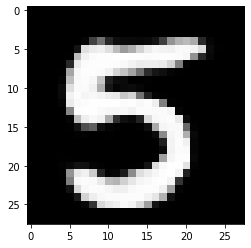

In [72]:
import cv2
import numpy as np
img_array = np.asarray(image1)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [73]:
image = image / 255
image = image.reshape(1, 784)
image = image.astype('float32')

prediction = np.argmax(myNetwork.predict(image), axis= -1)
print("predicted digit:", str(prediction))


predicted digit: [5]
